DATA : 5 postingan terkait Peraturan Presiden Nomor 75 Tahun 2024 tentang Percepatan Pembangunan Ibu Kota Nusantara (IKN) dari 4 media(bisnis.com, kompas.com, liputan6, dan liputan6.sctv)

### Import Data

In [153]:
import pandas as pd
file_path = 'D:/PROJEK/Analisis Sentimen/datakomentar.csv'
df = pd.read_csv(file_path, sep=';')
print(df.head())

                   akun                                               text
0           stevi_tampi  Busetttt, maksa betul nih orang, masyarakat yg...
1  faisalabdillahrahmat  Sesuatu yg buru buru ga baik tau kan sifatny s...
2        herry_tjahjono                              Gak respek ama mukidi
3            bregad_adi  Kasian kontraktornya pasti staffnya pada di ge...
4              hndratja                       Perpres kepres pepes diobral


In [154]:
df.shape

(5555, 2)

In [155]:
df.columns

Index(['akun', 'text'], dtype='object')

In [156]:
df.head(100)

,akun,text
0,stevi_tampi,"Busetttt, maksa betul nih orang, masyarakat yg..."
1,faisalabdillahrahmat,Sesuatu yg buru buru ga baik tau kan sifatny s...
2,herry_tjahjono,Gak respek ama mukidi
3,bregad_adi,Kasian kontraktornya pasti staffnya pada di ge...
4,hndratja,Perpres kepres pepes diobral
...,...,...
95,bharyanto99,😍😍😍
96,aunksyakur,D luar nalar ap Nurul Mukidi nih
97,wan_ishak_tahir2018,Buset tanah di IKN mau di gadaian hampir 2 abad
98,metals2004,Aku ora gelem


In [157]:
df = df.drop(['akun'], axis = 1)

In [158]:
df.head()

,text
0,"Busetttt, maksa betul nih orang, masyarakat yg..."
1,Sesuatu yg buru buru ga baik tau kan sifatny s...
2,Gak respek ama mukidi
3,Kasian kontraktornya pasti staffnya pada di ge...
4,Perpres kepres pepes diobral


### Text Preprocessing

Ada apa aja di dalam text prepocessing?
1. Lowercasing : ubah huruf menjadi huruf kecil
2. Tokenization : Memecah teks menjadi unit-unit kecil, seperti kata atau kalimat
3. Removing Punctuation : Menghapus tanda baca
4. Removing Stop Words : Menghapus kata-kata umum yang tidak memberikan banyak informasi (perlu daftar stopwords bahasa Indonesia)
5. Stemming : Mengubah kata ke bentuk dasarnya ('Sastrawi')
6. Lemmatization - keknya ga perlu, cukup stemming
7. Removing Numbers : Menghapus angka
8. Removing Extra Whitespace : Menghapus spasi berlebih
9. Handling Special Characters : Menghapus atau menangani karakter khusus
10. Handling Slang and Abbreviations : Mengubah singkatan atau bahasa gaul ke bentuk yang lebih formal, jika diperlukan






#### LOWERCASE, Num, Newline

In [159]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None

In [160]:
# Lowercases, Punctuation, Numbers and Newline Characters
def clean_text(text):
  # Lowercasing (Case Folding)
    text = text.str.lower()
    # Removing punctuations, numbers, and newline characters
    text = text.str.replace(r'@\w+', '', regex=True)
    text = text.str.replace(r'[^\w\s]', '', regex=True)
    text = text.str.replace("\n", '', regex=True)
    text = text.str.replace(r'\d', '', regex=True)
    return text

In [161]:
df["text"] = clean_text(df["text"])
df.head()

,text
0,busetttt maksa betul nih orang masyarakat yg d...
1,sesuatu yg buru buru ga baik tau kan sifatny s...
2,gak respek ama mukidi
3,kasian kontraktornya pasti staffnya pada di ge...
4,perpres kepres pepes diobral


In [162]:
df[99:200]

,text
99,th mah ngasih
100,NaN
101,
102,presiden terbaik sepanjang maksa eh masa
103,tahunanjirrrkiamat
...,...
195,jokowi terbaik
196,oke gas oke gas
197,keburu meninggalllll
198,semakin kliatan asli nya


In [163]:
df[120:131]

,text
120,pahlawan berjuang berkorban nyawa demi tanah a...
121,sokan ngambil freeport tp malah buat freeport ...
122,pahlawan nasional mempertahankan tanah air smp...
123,masih ngotot mau upacara an tahun ini di ikn
124,aku kira leader ternyata dealer
125,calon mangkrak kui lur lihat aja apbn udah hab...
126,luar biasadampak nya hampir abad
127,penentuan lama nya hgu ini ada uu nya kahatau ...
128,duuuh dulu aja belanda nggak segitunya
129,sejarah berulang dulu voc bersekongkol dgn tua...


In [164]:
print(df['text'].apply(type).value_counts())

text
<class 'str'>      5530
<class 'float'>      25
Name: count, dtype: int64


In [165]:
float_rows = df[df['text'].apply(lambda x: isinstance(x, float))]
print(float_rows)

     text
27    NaN
100   NaN
204   NaN
261   NaN
647   NaN
831   NaN
902   NaN
903   NaN
946   NaN
1175  NaN
1343  NaN
2152  NaN
2357  NaN
2436  NaN
2862  NaN
3059  NaN
3213  NaN
3392  NaN
3484  NaN
3598  NaN
3636  NaN
4307  NaN
5036  NaN
5080  NaN
5324  NaN


In [166]:
# Menghapus baris dengan data bertipe float / missing data
df = df[~df['text'].apply(lambda x: isinstance(x, float))]
df.shape

(5530, 1)

Normalisasi

In [167]:
# membaca file normalisasi
df_norm = pd.read_csv('D:/PROJEK/Analisis Sentimen/normal.csv', delimiter=";")
df_norm.head()

,asal,normal
0,ad,ada
1,ap,apa
2,ama,sama
3,blm,belum
4,ancuuurrr,hancur


In [168]:
print(df_norm['normal'].apply(type).value_counts())

normal
<class 'str'>    794
Name: count, dtype: int64


In [169]:
df_norm.columns = ['1','2']
df_norm.head()

,1,2
0,ad,ada
1,ap,apa
2,ama,sama
3,blm,belum
4,ancuuurrr,hancur


In [170]:
# Membuat kamus normalisasi menggunakan to_dict()
df_kamus = df_norm.set_index('1')['2'].to_dict()

In [171]:
def normalize_text(text, kamus):
    words = text.split()
    normalized_words = [kamus.get(word, word) for word in words]
    return ' '.join(normalized_words)

In [172]:
# Terapkan fungsi normalisasi pada kolom 'teks'
df['teks_normal'] = df['text'].apply(normalize_text, kamus=df_kamus)
df.head()

,text,teks_normal
0,busetttt maksa betul nih orang masyarakat yg d...,buset maksa betul ini orang masyarakat yang di...
1,sesuatu yg buru buru ga baik tau kan sifatny s...,sesuatu yang buru buru tidak baik tahu kan sif...
2,gak respek ama mukidi,tidak respek sama mukidi
3,kasian kontraktornya pasti staffnya pada di ge...,kasihan kontraktornya pasti staffnya pada di g...
4,perpres kepres pepes diobral,perpres kepres pepes diobral


In [173]:
df[125:132]

,text,teks_normal
127,penentuan lama nya hgu ini ada uu nya kahatau ...,penentuan lama nya hgu ini ada uu nya kahatau ...
128,duuuh dulu aja belanda nggak segitunya,duuuh dulu saja belanda tidak segitunya
129,sejarah berulang dulu voc bersekongkol dgn tua...,sejarah berulang dulu voc bersekongkol dengan ...
130,kekuatan merusaknya melebihi pendahulu nya owi...,kekuatan merusaknya melebihi pendahulu nya jok...
131,bukannya kita baru merdeka tahun yak nice ga...,bukannya kita baru merdeka tahun iya nice gata...
132,londo ireng ini ternyata,londo ireng ini ternyata
133,ganjil bgt pas in lahhitungan tahun komisi b...,ganjil banget pas ini lahhitungan tahun komisi...


In [174]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
df['stop_words'] =df ['teks_normal'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
df.head(30)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,teks_normal,stop_words
0,busetttt maksa betul nih orang masyarakat yg d...,buset maksa betul ini orang masyarakat yang di...,buset maksa orang masyarakat korbanin alhasil ...
1,sesuatu yg buru buru ga baik tau kan sifatny s...,sesuatu yang buru buru tidak baik tahu kan sif...,buru buru sifatnya
2,gak respek ama mukidi,tidak respek sama mukidi,respek mukidi
3,kasian kontraktornya pasti staffnya pada di ge...,kasihan kontraktornya pasti staffnya pada di g...,kasihan kontraktornya staffnya geber risiko ke...
4,perpres kepres pepes diobral,perpres kepres pepes diobral,perpres kepres pepes diobral
5,jangan maksa pak,jangan maksa pak,maksa
6,jgn lupa bayar kontraktor nya pa yg udah udah ...,jangan lupa bayar kontraktor nya pa yang sudah...,lupa bayar kontraktor nya pa proyek pemerintah...
7,utang di toko bangunan dilunasin dulu kasian m...,hutang di toko bangunan dilunasin dulu kasihan...,hutang toko bangunan dilunasin kasihan modalny...
8,ngapa harus buru buru pak jo,kenapa harus buru buru pak jo,buru buru jo
9,hari ini a besok b,hari ini a besok b,a besok b


In [175]:
df[126:131]

,text,teks_normal,stop_words
128,duuuh dulu aja belanda nggak segitunya,duuuh dulu saja belanda tidak segitunya,duuuh belanda segitunya
129,sejarah berulang dulu voc bersekongkol dgn tua...,sejarah berulang dulu voc bersekongkol dengan ...,sejarah berulang voc bersekongkol tuan tanah t...
130,kekuatan merusaknya melebihi pendahulu nya owi...,kekuatan merusaknya melebihi pendahulu nya jok...,kekuatan merusaknya melebihi pendahulu nya jok...
131,bukannya kita baru merdeka tahun yak nice ga...,bukannya kita baru merdeka tahun iya nice gata...,merdeka iya nice gatau kedepan going concern s...
132,londo ireng ini ternyata,londo ireng ini ternyata,londo ireng


In [176]:
#ini buat apa ya kan udah ada stop
stop_words = stopwords.words('indonesian')

In [177]:
df['text'] = df['stop_words'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
df.head()

,text,teks_normal,stop_words
0,buset maksa orang masyarakat korbanin alhasil ...,buset maksa betul ini orang masyarakat yang di...,buset maksa orang masyarakat korbanin alhasil ...
1,buru buru sifatnya,sesuatu yang buru buru tidak baik tahu kan sif...,buru buru sifatnya
2,respek mukidi,tidak respek sama mukidi,respek mukidi
3,kasihan kontraktornya staffnya geber risiko ke...,kasihan kontraktornya pasti staffnya pada di g...,kasihan kontraktornya staffnya geber risiko ke...
4,perpres kepres pepes diobral,perpres kepres pepes diobral,perpres kepres pepes diobral


In [178]:
more_stopword = ['aduh','a','b','nya','duuuh','sheikh','wkwkwkwkk','wkwkwkwkw','ceeeleemkkkkk','huahahahahahahahaha','eeehhhh', 'deh','tv','woi','wr','wb','hehehe','ah','hehe','hihihi',
                 'weh','hehee','hahaha','hai','ayo','loh','umr','la','hahahaha','dulor','lip','matte','berl',
                 'otik','ih','urson','muuach','muuachh','mmm','eh','oh','lau','wa','playgroup','tuh','bro'
                 'hahahahaaaaa','apasih','apain','wkwk','wkk','ulala','alah','wkwkwkwk','uh','deterzen','ngok',
                 'an','wkwkw','beb','bottoms','diapering','rugag','rugik','rigik','huaaaaa','eee','hahahahaha','hu','hihi',
                 'hahahha','o','aw','hah','guys','hahay','cu','wkwkkw','ngaab','meong','wkwkwk','ups','xnxx','wkwkwkwkwk','hik',
                 'xxnx','adududu','wkwkkwk','wkwkwkkk', 'wkkwkwkwkw','wkwkwkk','suu','kekekekke','ahhahaha','awokawok','aw','wakakakaka','ppp','wih',
                 'hmm','rrrrrr','wkwwkwkwk','mwehehehe','wkwkkwkw','heheee','hahha','hahah','wwkwkwkw','ha','m','ehm','hahaaaaa',
                 'wkek','wouw','hhahhaaha','hahahaa','hha','ekekekekekekek','wakakakakak','kwwkwk','haha','ahahah','cie','hahahahah',
                 'hhahhaaha','hahahaa','opa','nih','kok','ko','apa','kan', 'yaa', 'sih', 'gih','coyyy',
                'yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'ia', 'seperti',
                 'jika', 'sehingga', 'dan', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'setelah', 'kami',
                 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'bisa',
                 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'saya', 'terhadap', 'secara',
                 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi',
                 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'supaya', 'kah', 'pun', 'sampai',
                 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya',
                 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'demikian',
                 'tapi', 'ingin', 'juga', 'mari', 'nanti', 'melainkan', 'oh', 'ok', 'seharusnya', 'sebetulnya',
                 'setiap', 'setidaknya', 'sesuatu', 'saja', 'toh', 'ya', 'walau','tentu', 'yakni','nya',
                 'apalagi', 'uwow','bagaimanapun','laaaah','brayy','oiiii','ciiee','iya','mah','kyknya',
                 'waaaahhhh','sihh','lur','lho','sech','wkwkwkwkwkwkwkwkwkwkwkwkwk','n','woii',
                 'wee','yakan','ny','si','kyknya','waaaahhhh','sihh','lur','blass','sech',
                 'ae','n','woii','wee','yakan','ny']
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in more_stopword))
df.head()

,text,teks_normal,stop_words
0,buset maksa orang masyarakat korbanin alhasil ...,buset maksa betul ini orang masyarakat yang di...,buset maksa orang masyarakat korbanin alhasil ...
1,buru buru sifatnya,sesuatu yang buru buru tidak baik tahu kan sif...,buru buru sifatnya
2,respek mukidi,tidak respek sama mukidi,respek mukidi
3,kasihan kontraktornya staffnya geber risiko ke...,kasihan kontraktornya pasti staffnya pada di g...,kasihan kontraktornya staffnya geber risiko ke...
4,perpres kepres pepes diobral,perpres kepres pepes diobral,perpres kepres pepes diobral


In [180]:
df.head(20)

,text,teks_normal,stop_words
0,buset maksa orang masyarakat korbanin alhasil ...,buset maksa betul ini orang masyarakat yang di...,buset maksa orang masyarakat korbanin alhasil ...
1,buru buru sifatnya,sesuatu yang buru buru tidak baik tahu kan sif...,buru buru sifatnya
2,respek mukidi,tidak respek sama mukidi,respek mukidi
3,kasihan kontraktornya staffnya geber risiko ke...,kasihan kontraktornya pasti staffnya pada di g...,kasihan kontraktornya staffnya geber risiko ke...
4,perpres kepres pepes diobral,perpres kepres pepes diobral,perpres kepres pepes diobral
5,maksa,jangan maksa pak,maksa
6,lupa bayar kontraktor pa proyek pemerintah sus...,jangan lupa bayar kontraktor nya pa yang sudah...,lupa bayar kontraktor nya pa proyek pemerintah...
7,hutang toko bangunan dilunasin kasihan modalny...,hutang di toko bangunan dilunasin dulu kasihan...,hutang toko bangunan dilunasin kasihan modalny...
8,buru buru jo,kenapa harus buru buru pak jo,buru buru jo
9,besok,hari ini a besok b,a besok b


In [181]:
df.drop(['teks_normal','stop_words'], axis=1, inplace=True)
df.head()

,text
0,buset maksa orang masyarakat korbanin alhasil ...
1,buru buru sifatnya
2,respek mukidi
3,kasihan kontraktornya staffnya geber risiko ke...
4,perpres kepres pepes diobral


In [182]:
print(df['text'].apply(type).value_counts())

text
<class 'str'>    5530
Name: count, dtype: int64


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5530 entries, 0 to 5554
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5530 non-null   object
dtypes: object(1)
memory usage: 86.4+ KB


Tokenizing

In [92]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --- ------------------------------------ 61.4/624.3 kB 1.1 MB/s eta 0:00:01
   --- ------------------------------------ 61.4/624.3 kB 1.1 MB/s eta 0:00:01
   ----- --------------------------------- 92.2/624.3 kB 655.4 kB/s eta 0:00:01
   -------- ----------------------------- 143.4/624.3 kB 774.0 kB/s eta 0:00:01
   ------------ ------------------------- 204.8/624.3 kB 888.4 kB/s eta 0:00:01
   -------------------- ------------------- 317.4/624.3 kB 1.1 MB/s eta 0:00:01
   ---------------------- ----------------- 358.4/624.3 kB 1.1 MB/s eta 0:00:01
   ------------------------- -------------- 399.4/624.3 kB 1.1 MB/s eta 0:00:01
   ---------------------------- ----------- 440.3/624.3 kB 1.1 MB/s eta 0:00:01
   -------------------------------- ------- 501.8/624.3 kB 1.1 MB/s eta 0:00:01
   ---------------------------------- ----- 532.5/624.3 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- - 604.2/6


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [93]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [184]:
from textblob import TextBlob

In [185]:
# Tokenization
df["text"].apply(lambda x: TextBlob(x).words)

0       [buset, maksa, orang, masyarakat, korbanin, al...
1                                  [buru, buru, sifatnya]
2                                        [respek, mukidi]
3       [kasihan, kontraktornya, staffnya, geber, risi...
4                       [perpres, kepres, pepes, diobral]
                              ...                        
5550                                          [kampungan]
5551    [voc, menguasai, indonesiarahardjo, moal, paha...
5552                                          [sederhana]
5553                                   [rumus, kebalikan]
5554       [abad, bambang, freeport, selesai, perpanjang]
Name: text, Length: 5530, dtype: object

In [96]:
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() != 'iya']))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() != 'nya']))
df.head()

,text
0,buset maksa orang masyarakat korbanin alhasil ...
1,buru buru sifatnya
2,respek mukidi
3,kasihan kontraktornya staffnya geber risiko ke...
4,perpres kepres pepes diobral


In [186]:
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() != 'iya']))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() != 'nya']))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() != 'negara']))
df.head()

,text
0,buset maksa orang masyarakat korbanin alhasil ...
1,buru buru sifatnya
2,respek mukidi
3,kasihan kontraktornya staffnya geber risiko ke...
4,perpres kepres pepes diobral


In [187]:
df.head(30)

,text
0,buset maksa orang masyarakat korbanin alhasil ...
1,buru buru sifatnya
2,respek mukidi
3,kasihan kontraktornya staffnya geber risiko ke...
4,perpres kepres pepes diobral
5,maksa
6,lupa bayar kontraktor pa proyek pemerintah sus...
7,hutang toko bangunan dilunasin kasihan modalny...
8,buru buru jo
9,besok


Stemming

In [31]:
!pip install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00


In [188]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Contoh token yang telah di-tokenize
tokens = df["text"]

# Melakukan stemming pada setiap token
stemmed_token = [stemmer.stem(token) for token in tokens]

print(stemmed_token)

['buset maksa orang masyarakat korbanin alhasil pajak naikin bener respect banget orang bikin geleng kepala', 'buru buru sifat', 'respek mukidi', 'kasihan kontraktor staffnya geber risiko kerja keras mundur kerja keras bro kadang atas lupa ngasih apresiasi calon bos apresiasi mundur pindah usaha hidup pilih bos oke bos dapet tender nyimak gas bro cuan', 'pres pres pepes obral', 'maksa', 'lupa bayar kontraktor pa proyek perintah susah bayar', 'hutang toko bangun dilunasin kasihan modal kering karyawan makan', 'buru buru jo', 'besok', 'jual bu', 'jokowi bondowoso', 'tinggal keluarin keprets panjang jabat', '', 'cepat mangkrak mksdnya', 'saking laku', 'maju kena mundur hancur rasakno', 'bingung', '', 'buang energi', 'ngebet banget lihat uang gara gara ikn kena inflasi', 'bebas terbitin pres serius nanya', 'prihatin tabur incentive investor minat investasi i k', 'ambisi banget yok urusin rakyat konoha susah', 'tinggal ikn', 'efek beritaberita pindah ikn', 'ambisius bett', 'orang tunda pres

### Lexicon-Based (Pelabelan)

In [189]:
import csv

def load_lexicon_tsv(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.reader(file, delimiter='\t')
        lexicon = set()
        for row in reader:
            if row:  # Pastikan baris tidak kosong
                lexicon.add(row[0].strip())
    return lexicon

# Memuat kamus positif dan negatif dari file TSV
positive_words = load_lexicon_tsv('D:/PROJEK/Analisis Sentimen/InSet-master/positive.tsv')
negative_words = load_lexicon_tsv('D:/PROJEK/Analisis Sentimen/InSet-master/negative.tsv')


In [190]:
def sentiment_score(text, positive_words, negative_words):
    words = text.lower().split()
    score = 0
    for word in words:
        if word in positive_words:
            score += 1
        elif word in negative_words:
            score -= 1
    return score

def classify_sentiment(score):
    if score > 0:
        return "Positif"
    elif score < 0:
        return "Negatif"
    else:
        return "Netral"

# Menyimpan hasil klasifikasi
results = []
for text in stemmed_token:
    score = sentiment_score(text, positive_words, negative_words)
    sentiment = classify_sentiment(score)
    results.append({'text': text, 'sentiment': sentiment})

# Contoh output
for result in results:
    print(f"Text: '{result['text']}' - Sentiment: {result['sentiment']}")


Text: 'buset maksa orang masyarakat korbanin alhasil pajak naikin bener respect banget orang bikin geleng kepala' - Sentiment: Negatif
Text: 'buru buru sifat' - Sentiment: Positif
Text: 'respek mukidi' - Sentiment: Netral
Text: 'kasihan kontraktor staffnya geber risiko kerja keras mundur kerja keras bro kadang atas lupa ngasih apresiasi calon bos apresiasi mundur pindah usaha hidup pilih bos oke bos dapet tender nyimak gas bro cuan' - Sentiment: Positif
Text: 'pres pres pepes obral' - Sentiment: Negatif
Text: 'maksa' - Sentiment: Negatif
Text: 'lupa bayar kontraktor pa proyek perintah susah bayar' - Sentiment: Positif
Text: 'hutang toko bangun dilunasin kasihan modal kering karyawan makan' - Sentiment: Positif
Text: 'buru buru jo' - Sentiment: Positif
Text: 'besok' - Sentiment: Netral
Text: 'jual bu' - Sentiment: Positif
Text: 'jokowi bondowoso' - Sentiment: Netral
Text: 'tinggal keluarin keprets panjang jabat' - Sentiment: Positif
Text: '' - Sentiment: Netral
Text: 'cepat mangkrak mks

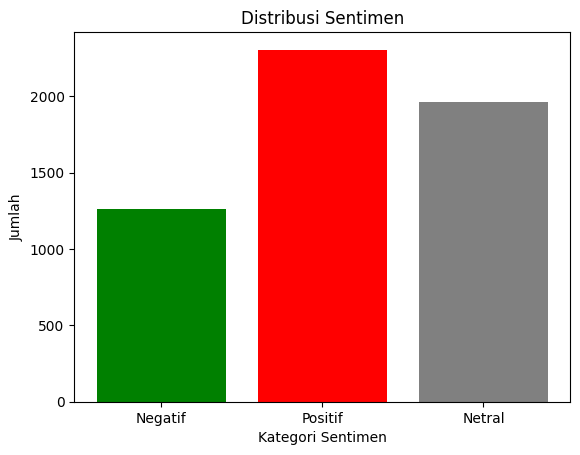

In [191]:
import matplotlib.pyplot as plt
from collections import Counter

# Menghitung jumlah setiap kategori sentimen
sentiment_counts = Counter([result['sentiment'] for result in results])

# Membuat bar chart
plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color=['green', 'red', 'gray'])
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah')
plt.title('Distribusi Sentimen')
plt.show()

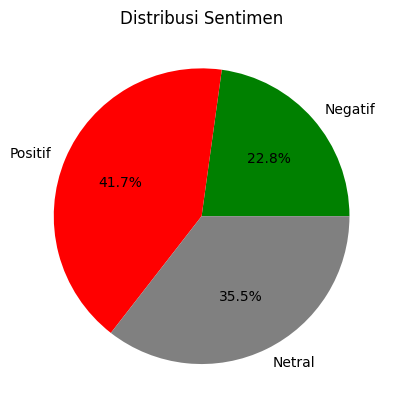

In [192]:
plt.pie(sentiment_counts.values(), labels=sentiment_counts.keys(), colors=['green', 'red', 'gray'], autopct='%1.1f%%')
plt.title('Distribusi Sentimen')
plt.show()

In [193]:
# Mengubah data ke DataFrame
df = pd.DataFrame(results)

# Menampilkan DataFrame
print(df)

                                                   text sentiment
0     buset maksa orang masyarakat korbanin alhasil ...   Negatif
1                                       buru buru sifat   Positif
2                                         respek mukidi    Netral
3     kasihan kontraktor staffnya geber risiko kerja...   Positif
4                                 pres pres pepes obral   Negatif
...                                                 ...       ...
5525                                            kampung    Netral
5526  voc kuasa indonesiarahardjo moal pahameun voch...   Positif
5527                                          sederhana   Positif
5528                                        rumus balik   Negatif
5529              abad bambang freeport selesai panjang   Positif

[5530 rows x 2 columns]


In [194]:
# Menghitung jumlah data dengan label 'Positif'
jumlah_positif = df[df['sentiment'] == 'Positif'].shape[0]
print(f"Jumlah data dengan label Positif: {jumlah_positif}")

# Menghitung jumlah data dengan label 'Negatif'
jumlah_negatif = df[df['sentiment'] == 'Negatif'].shape[0]
print(f"Jumlah data dengan label Negatif: {jumlah_negatif}")

# Menghitung jumlah data dengan label 'Netral'
jumlah_netral = df[df['sentiment'] == 'Netral'].shape[0]
print(f"Jumlah data dengan label Negatif: {jumlah_netral}")

Jumlah data dengan label Positif: 2304
Jumlah data dengan label Negatif: 1262
Jumlah data dengan label Negatif: 1964


In [195]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan teks berdasarkan kategori sentimen
positif_text = " ".join([result['text'] for result in results if result['sentiment'] == "Positif"])
negatif_text = " ".join([result['text'] for result in results if result['sentiment'] == "Negatif"])
netral_text = " ".join([result['text'] for result in results if result['sentiment'] == "Netral"])

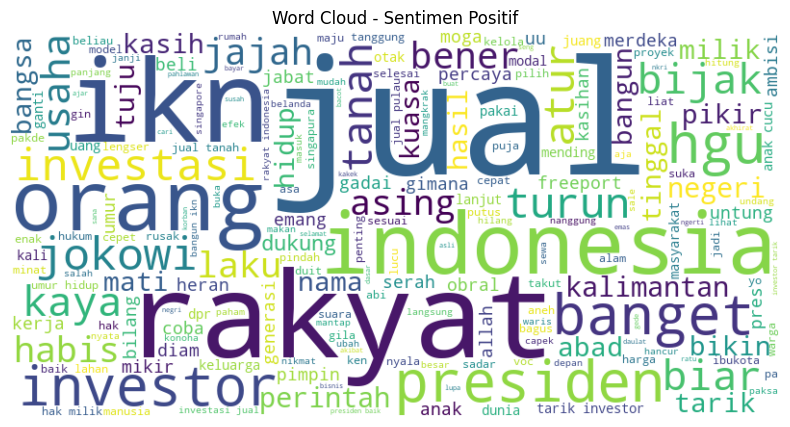

In [196]:
# Word Cloud untuk Sentimen Positif
wordcloud_positif = WordCloud(width=800, height=400, background_color='white').generate(positif_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positif, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Sentimen Positif')
plt.savefig('Word Cloud - Sentimen Positif.png')
plt.show()

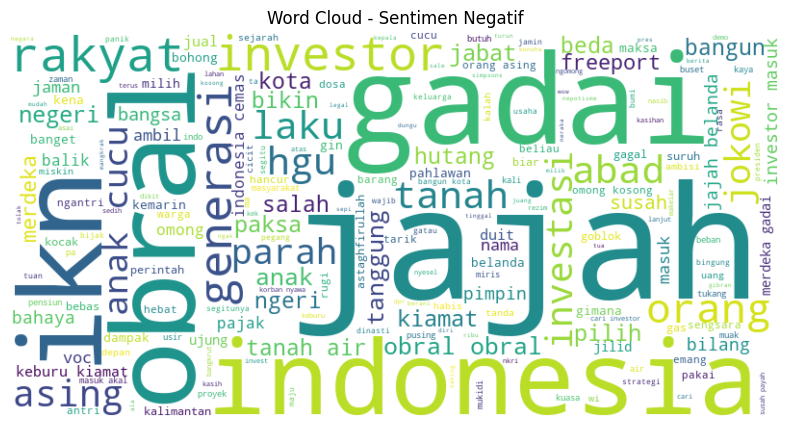

In [197]:
# Word Cloud untuk Sentimen Negatif
wordcloud_negatif = WordCloud(width=800, height=400, background_color='white').generate(negatif_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negatif, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Sentimen Negatif')
plt.savefig('Word Cloud - Sentimen Negatif.png')
plt.show()

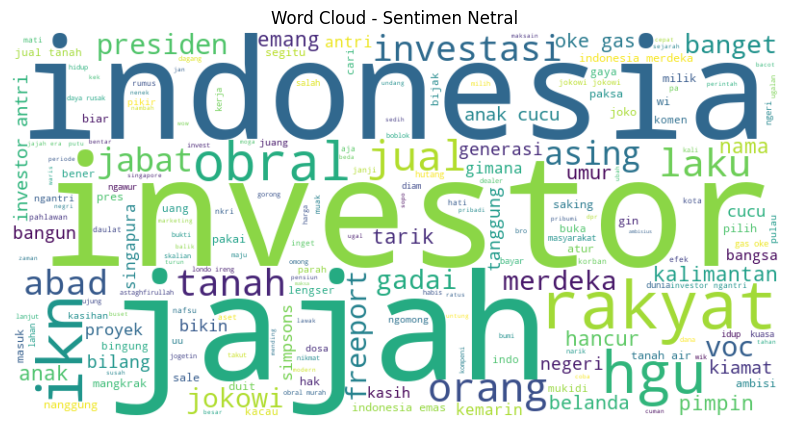

In [198]:
# Word Cloud untuk Sentimen Netral
wordcloud_netral = WordCloud(width=800, height=400, background_color='white').generate(netral_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_netral, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Sentimen Netral')
plt.savefig('Word Cloud - Sentimen Netral.png')
plt.show()

### TF-IDF

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

# Inisialisasi TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Transformasikan data training dan testing dengan TF-IDF
X_train_tfidf = tfidf.fit_transform(X_train)  # Fit dan transformasi pada data training
X_test_tfidf = tfidf.transform(X_test)        # Hanya transformasi pada data testing

In [135]:
# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.3, random_state=42)

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit dan transformasi data training
tfidf_train_matrix = tfidf_vectorizer.fit_transform(X_train)

# Fit dan transformasi data testing
tfidf_test_matrix = tfidf_vectorizer.transform(X_test)

# Mendapatkan fitur (kata/term) dari TF-IDF
terms = tfidf_vectorizer.get_feature_names_out()

# Membuat DataFrame untuk menampilkan hasil dengan kolom komentar, term, dan weight
def create_tfidf_table(tfidf_matrix, data):
    result = []

    # Mengonversi hasil menjadi format yang lebih mudah dipahami
    for i, comment in enumerate(data):
        for j, term in enumerate(terms):
            weight = tfidf_matrix[i, j]
            if weight > 0:  # Hanya menampilkan term yang memiliki bobot (weight) non-zero
                result.append([i+1, j+1, weight])  # Menggunakan ID numerik untuk komentar dan term

    # Mengonversi ke DataFrame
    df_result = pd.DataFrame(result, columns=['Komentar ID', 'Term ID', 'Weight'])
    return df_result

# Membuat tabel TF-IDF untuk data training
df_train_tfidf = create_tfidf_table(tfidf_train_matrix, X_train)

# Membuat tabel TF-IDF untuk data testing
df_test_tfidf = create_tfidf_table(tfidf_test_matrix, X_test)

# Menampilkan tabel hasil untuk data training dan testing
print("TF-IDF untuk data training:")
print(df_train_tfidf)

print("\nTF-IDF untuk data testing:")
print(df_test_tfidf)

TF-IDF untuk data training:
       Komentar ID  Term ID    Weight
0                1     1238  0.536155
1                1     1650  0.247061
2                1     2661  0.449410
3                1     2804  0.317366
4                1     3512  0.247681
...            ...      ...       ...
17234         3870      736  0.590893
17235         3871      765  0.540248
17236         3871     1840  0.514683
17237         3871     2027  0.540248
17238         3871     2940  0.389057

[17239 rows x 3 columns]

TF-IDF untuk data testing:
      Komentar ID  Term ID    Weight
0               1     1893  1.000000
1               3     1910  0.771869
2               3     2014  0.635781
3               4      155  0.835119
4               4     1588  0.550069
...           ...      ...       ...
5884         1658     3106  1.000000
5885         1659     1074  0.849252
5886         1659     1798  0.424626
5887         1659     2790  0.197344
5888         1659     4131  0.243966

[5889 rows x 3 co

In [138]:
komentar = df['text']
# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit dan transform data komentar
tfidf_matrix = tfidf_vectorizer.fit_transform(komentar)

# Mendapatkan fitur (kata/term) dan bobotnya
terms = tfidf_vectorizer.get_feature_names_out()

# Membuat DataFrame untuk menampilkan hasil dengan kolom komentar, term, dan weight
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)

# Membuat tabel yang menampilkan komentar, term, dan weight
result = []

# Mengonversi hasil menjadi format yang lebih mudah dipahami
for i, comment in enumerate(komentar):
    for term, weight in zip(terms, tfidf_matrix[i].toarray()[0]):
        if weight > 0:  # Hanya menampilkan term yang memiliki bobot (weight) non-zero
            result.append([comment, term, weight])

df_result = pd.DataFrame(result, columns=['Komentar', 'Term', 'Weight'])
print(df_result)

                                                Komentar      Term    Weight
0      buset maksa orang masyarakat korbanin alhasil ...   alhasil  0.303732
1      buset maksa orang masyarakat korbanin alhasil ...    banget  0.162266
2      buset maksa orang masyarakat korbanin alhasil ...     bener  0.205705
3      buset maksa orang masyarakat korbanin alhasil ...     bikin  0.186857
4      buset maksa orang masyarakat korbanin alhasil ...     buset  0.252582
...                                                  ...       ...       ...
24318              abad bambang freeport selesai panjang      abad  0.350093
24319              abad bambang freeport selesai panjang   bambang  0.578302
24320              abad bambang freeport selesai panjang  freeport  0.368730
24321              abad bambang freeport selesai panjang   panjang  0.446804
24322              abad bambang freeport selesai panjang   selesai  0.455418

[24323 rows x 3 columns]


### SVM

KERNEL LINIER

In [123]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid
param_grid = {
    'kernel': ['linear'],
    'max_iter' : [-1, 0.01, 0.1, 1],
    'C': [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 10, 20,40, 100],
}

# Inisialisasi model SVM
svm_model = SVC()

# Inisialisasi GridSearchCV dengan model dan parameter grid
grid_search = GridSearchCV(svm_model, param_grid, cv=5)

# Latih model dengan GridSearchCV
grid_search.fit(X_train_tfidf, y_train)

# Hasil parameter terbaik
print(f'Best parameters found: {grid_search.best_params_}')

# Evaluasi model terbaik
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)
print(f'Akurasi: {accuracy_score(y_test, y_pred):.2f}')

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\ASUS\AppDat

Best parameters found: {'C': 10, 'kernel': 'linear', 'max_iter': -1}
Akurasi: 0.84


In [141]:
#Linier
svm_model = SVC(max_iter=-1, C=10,kernel='linear')

# Latih model SVM pada data training
svm_model.fit(X_train_tfidf, y_train)
# Prediksi data testing
y_pred = svm_model.predict(X_test_tfidf)
# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model: {accuracy:.2f}')

Akurasi model: 0.84


In [126]:
#Classification Report
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[208  48   1]
 [ 38 306  46]
 [  9  39 411]]

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.82      0.81      0.81       257
      Netral       0.78      0.78      0.78       390
     Positif       0.90      0.90      0.90       459

    accuracy                           0.84      1106
   macro avg       0.83      0.83      0.83      1106
weighted avg       0.84      0.84      0.84      1106



KERNEL SIGMOID

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid
param_grid = {
    'kernel': ['sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'coef0': [0.0, 0.5, 1.0]
}

# Inisialisasi model SVM
svm_model = SVC()

# Inisialisasi GridSearchCV dengan model dan parameter grid
grid_search = GridSearchCV(svm_model, param_grid, cv=5)

# Latih model dengan GridSearchCV
grid_search.fit(X_train_tfidf, y_train)

# Hasil parameter terbaik
print(f'Best parameters found: {grid_search.best_params_}')

# Evaluasi model terbaik
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)
print(f'Akurasi: {accuracy_score(y_test, y_pred):.2f}')

Best parameters found: {'C': 1, 'coef0': 0.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
Akurasi: 0.79


In [ ]:
#Linear Baru Sigmoid
svm_model = SVC(max_iter=-1, gamma=1.0, C=1, coef0=0.0,kernel='sigmoid')

# Latih model SVM pada data training
svm_model.fit(X_train_tfidf, y_train)

# Prediksi data testing
y_pred = svm_model.predict(X_test_tfidf)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model: {accuracy:.2f}')

Akurasi model: 0.79


In [122]:
#Classification Report
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[179  73   5]
 [ 38 295  57]
 [  4  56 399]]

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.81      0.70      0.75       257
      Netral       0.70      0.76      0.72       390
     Positif       0.87      0.87      0.87       459

    accuracy                           0.79      1106
   macro avg       0.79      0.77      0.78      1106
weighted avg       0.79      0.79      0.79      1106



KERNEL RBF

In [ ]:
# Definisikan parameter grid
param_grid = {
    'kernel': ['rbf'],
    'C': [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 10, 20, 40, 100],
    'gamma': [ 0.01, 0.1, 0.5, 1, 10, 20, 40, 50, 100, 1000],
}

svm_model = SVC()
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train_tfidf, y_train)

print(f'Best parameters found: {grid_search.best_params_}')

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)
print(f'Akurasi: {accuracy_score(y_test, y_pred):.2f}')

Best parameters found: {'C': 40, 'gamma': 0.1, 'kernel': 'rbf'}
Akurasi: 0.83


In [128]:
#SVM RBF
svm_model = SVC(gamma=0.1, C=100, kernel='rbf')
svm_model.fit(X_train_tfidf, y_train)
y_pred = svm_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model RBF: {accuracy:.2f}')

Akurasi model RBF: 0.83


In [129]:
print("Confusion Matrix RBF:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix RBF:
[[208  48   1]
 [ 38 301  51]
 [  8  37 414]]

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.82      0.81      0.81       257
      Netral       0.78      0.77      0.78       390
     Positif       0.89      0.90      0.90       459

    accuracy                           0.83      1106
   macro avg       0.83      0.83      0.83      1106
weighted avg       0.83      0.83      0.83      1106



KERNEL POLYNOMIAL

In [152]:
param_grid = {
    'kernel': ['poly'],
    'degree': [2, 3, 4, 5],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'coef0': [0.0, 0.5, 1.0]
}

svm_model = SVC()
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train_tfidf, y_train)

print(f'Best parameters found: {grid_search.best_params_}')

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)
print(f'Akurasi: {accuracy_score(y_test, y_pred):.2f}')

Best parameters found: {'C': 10, 'coef0': 1.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
Akurasi: 0.82


In [149]:
svm_model = SVC(degree=2, C=10, gamma='scale', coef0=1, kernel='poly')
svm_model.fit(X_train_tfidf, y_train)

y_pred = svm_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model polynomial: {accuracy:.2f}')

Akurasi model polynomial: 0.82


In [ ]:
print("Confusion Matrix Polynomial:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix Polynomial:
[[208  48   1]
 [ 38 306  46]
 [  9  39 411]]

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.82      0.81      0.81       257
      Netral       0.78      0.78      0.78       390
     Positif       0.90      0.90      0.90       459

    accuracy                           0.84      1106
   macro avg       0.83      0.83      0.83      1106
weighted avg       0.84      0.84      0.84      1106



Akurasi yang diperoleh
- Kernel Linear = 84%
- Kernel Sigmoid = 79%
- Kernel RBF = 83%
- Kernel Polynomial = 82%